Copyright (c) 2021 Nongnuch Artrith (nartrith@atomistic.net)

Example usage of the ænet-Tinker interface for molecular dynamics simulations with artificial neural network (ANN) potentials.


In [1]:
import os

**The following lines might have to be adjusted for your ssystem.  `intel_init` sets the command used to initialize the Intel compilers.  `num_cores` is the number of cores to be used for MD simulations.**

In [2]:
intel_init = "source /opt/intel/bin/compilervars.sh intel64 2> /dev/null"
num_cores = 1

# 1. Compiling ænet

The following instructions download ænet and compile the ænet library version 2.0.4

In [3]:
if not os.path.exists('aenet'):
  !! git clone https://github.com/atomisticnet/aenet.git --branch v2.0.4

Now, ænet can be compiled.  We build both the `aenet` executables and the library (`libaenet.a`), since the Fortran code Tinker can also make use of the ænet module files .

In [4]:
cmd = """\
{}
cd aenet/lib/
sed -i "s/FC *= *.*$/FC = ifort -c/" Makefile
make
cd ../..
cd aenet/src/
make -f makefiles/Makefile.ifort_serial
make -f makefiles/Makefile.ifort_serial lib
cd ../../
""".format(intel_init)
!{cmd}

tar xfvz Lbfgsb.3.0.tar.gz
./._Lbfgsb.3.0
Lbfgsb.3.0/
Lbfgsb.3.0/._algorithm.pdf
Lbfgsb.3.0/algorithm.pdf
Lbfgsb.3.0/blas.f
Lbfgsb.3.0/._code.pdf
Lbfgsb.3.0/code.pdf
Lbfgsb.3.0/driver1.f
Lbfgsb.3.0/driver1.f90
Lbfgsb.3.0/driver2.f
Lbfgsb.3.0/driver2.f90
Lbfgsb.3.0/driver3.f
Lbfgsb.3.0/driver3.f90
Lbfgsb.3.0/._iterate.dat
Lbfgsb.3.0/iterate.dat
Lbfgsb.3.0/lbfgsb.f
Lbfgsb.3.0/License.txt
Lbfgsb.3.0/linpack.f
Lbfgsb.3.0/._Makefile
Lbfgsb.3.0/Makefile
Lbfgsb.3.0/._OUTPUTS
Lbfgsb.3.0/OUTPUTS/
Lbfgsb.3.0/README
Lbfgsb.3.0/timer.f
Lbfgsb.3.0/x.lbfgsb_77_1
Lbfgsb.3.0/x.lbfgsb_77_2
Lbfgsb.3.0/x.lbfgsb_77_3
Lbfgsb.3.0/x.lbfgsb_90_1
Lbfgsb.3.0/x.lbfgsb_90_2
Lbfgsb.3.0/x.lbfgsb_90_3
Lbfgsb.3.0/OUTPUTS/._output_77_1
Lbfgsb.3.0/OUTPUTS/output_77_1
Lbfgsb.3.0/OUTPUTS/._output_77_2
Lbfgsb.3.0/OUTPUTS/output_77_2
Lbfgsb.3.0/OUTPUTS/._output_77_3
Lbfgsb.3.0/OUTPUTS/output_77_3
Lbfgsb.3.0/OUTPUTS/._output_90_1
Lbfgsb.3.0/OUTPUTS/output_90_1
Lbfgsb.3.0/OUTPUTS/._output_90_2
Lbfgsb.3.0/OUTPUTS/output_90_2


# 2. Download the `aenet-tinker` interface

The ænet-Tinker interface is separately maintained and distributed. We download it here.

In [5]:
if not os.path.exists('aenet-tinker'):
  !! git clone https://github.com/atomisticnet/aenet-tinker.git

# 3. Compiling Tinker with ænet support

Now, we download and compile Tinker version 8.9.1, using the ænet library that we built above.  

**Note:** The links on the Tinker website are not permanent, and you might have to update the address to the current version (or latest revision of version 8).

Tinker website: https://dasher.wustl.edu/tinker/

In [6]:
if not os.path.exists('tinker'):
  !! wget https://dasher.wustl.edu/tinker/downloads/tinker-8.9.1.tar.gz
  !! tar xfvz tinker-8.9.1.tar.gz

Some files from the `aenet-tinker` directory simply need to be copied over to the Tinker `source` directory.

* `aenettinker.f90`
* `extra.f`
* `extra1.f`

Additionally, the `aenet.mod` module file from the main aenet source directory also needs to be copied over.


In [7]:
! cp aenet-tinker/src/*.f* tinker/source/
! cp aenet/src/aenet.* tinker/source/

If a Makefile for your version of Tinker is available in `aenet-tinker/src/makefiles`, then we recommend using this file directly.  If the precise version is not available, start with Tinker's own Makefile (`tinker/make/Makefile`) and apply the patch in `aenet-tinker/src/makefiles` that is closest in version number.

In our example case, we can copy the available Makefile:

In [8]:
! cp aenet-tinker/src/makefiles/Makefile.aenetlib_ifort.tinker-8.9.1 tinker/source/Makefile

Now, the `Makefile` still might have to be edited to ensure that compiler settings are paths are correct.  In our case, the paths to `aenet` and `tinker` need to be updated:

In [9]:
%cd tinker/source/
!sed -i 's|TINKERDIR *= *.*$|TINKERDIR = ../../tinker|g' Makefile
!sed -i 's|AENETDIR *= *.*$|AENETDIR = ../../aenet|g' Makefile
%cd ../..

/data/home/na2782/aenet-tinker-test-2/tinker/source
/data/home/na2782/aenet-tinker-test-2


The rest of the Makefile should be fine for a generic Linux.  So, Tinker can now be compiled.

**Note:** This can take a few minutes!

In [10]:
cmd = """\
{}
cd tinker/source/
make
chmod a+x ./dynamic.x
cd ../..
""".format(intel_init)
!{cmd}

ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp analyz.f -o analyz.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp sizes.f -o sizes.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp atoms.f -o atoms.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp energi.f -o energi.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp files.f -o files.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp inform.f -o inform.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp iounit.f -o iounit.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp katoms.f -o katoms.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp mutant.f -o mutant.o
ifort -c -xHost -I../../aenet/src  -O3 -no-ipo -no-prec-div -recursive -qopenmp potent.f -o poten

# 4. Running Tinker with aenet ANN potentials

An example Tinker molecular dynamics simulation of amorphous LiSi with an ænet ANN potential is provided in the directory `aenet-tinker/examples/01-ANN-MD-aLiSi`.

**In short:** (1) the file `aenet.prm` needs to be present to define the masses of all atomic species.  (2) all ANN potentials need to be provided in files named `<symbol>.ann`, where `<symbol>` is the chemical symbol.  And, (3) the Tinker *key* file has to contain the following line:

```
EXTRATERM only
```

In [11]:
if not os.path.exists('md-example'):
  ! mkdir md-example
  ! cp aenet-tinker/examples/02-ANN-MD-aLiSi-aenet-2.0.4-tinker-8.9.1/* ./md-example/

We can now run an example MD simulation with Tinker's `dynamic.x` tool.

The meaning of the command-line options to `dynamic.x` after `-k md.key` are:

* initial atomic structure: "md.xyz"
* MD steps: 100
* time step in fs: 2.0
* time between write out in ps: 0.002
* MD type: 2 (= NVT)
* temperature in Kelvin: 800

In [12]:
%cd md-example/
cmd = """\
{}
../tinker/source/dynamic.x -k md.key md.xyz 100 2.0 0.002 2 800 | tee dynamic.out
""".format(intel_init)
!{cmd}
%cd ..

/data/home/na2782/aenet-tinker-test-2/md-example

     ######################################################################
   ##########################################################################
  ###                                                                      ###
 ###            Tinker  ---  Software Tools for Molecular Design            ###
 ##                                                                          ##
 ##                         Version 8.9.1  June 2021                         ##
 ##                                                                          ##
 ##               Copyright (c)  Jay William Ponder  1990-2021               ##
 ###                           All Rights Reserved                          ###
  ###                                                                      ###
   ##########################################################################
     ######################################################################

OMP

Visualization of some key data from the MD trajectory:

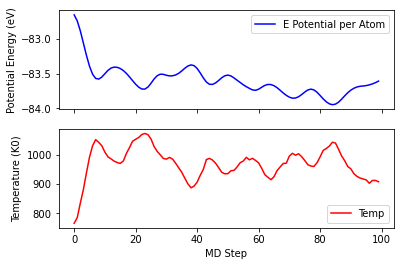

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import re

data = []
with open('md-example/dynamic.out') as fp:
    for line in fp:
        if re.match(r"^ *[0-9]", line):
            try:
                fields = line.split()
                data.append([float(f) for f in fields[1:]])
            except ValueError:
                pass

df = pd.DataFrame(data=data, 
                  columns=["E Total", "E Potential", 
                           "E Kinetic", "Temp", "Pres"])

fig, ax = plt.subplots(2, 1, sharex=True)
df['E Potential per Atom'] = df['E Potential']/256
df.plot(y="E Potential per Atom", color='blue', ax=ax[0])
ax[0].set_ylabel("Potential Energy (eV)")
df.plot(y="Temp", color='red', ax=ax[1])
ax[1].set_xlabel("MD Step")
ax[1].set_ylabel("Temperature (K0)")
plt.show()